<a href="https://colab.research.google.com/github/KhotNoorin/Machine-Learning-/blob/main/Multinomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Logistic Regression:

---

Multinomial Logistic Regression (MLR) is a classification algorithm used when the target variable has more than two nominal (unordered) categories. It's a generalization of binary logistic regression.



---

When to Use
- Target variable is categorical with 3 or more classes

- Classes are not ordered (e.g., cat, dog, rabbit)

---

How It Works
1. Choose one class as a baseline.

2. For each of the other k−1 classes:
 - Compute the log-odds against the baseline.

3. Use softmax function to convert scores into probabilities.

---

Advantages
- Can handle multiple classes directly.

- Interpretable as log-odds.

- Well-supported in libraries like scikit-learn and statsmodels.



---

Disadvantages
- Requires more data and computation than binary logistic regression.

- Assumes independence of irrelevant alternatives (IIA).



---



In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [36]:
# Load data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [37]:
# Use only two features for visualization (required by plot_decision_regions)
X = df[['sepal length (cm)', 'petal length (cm)']].values  # as NumPy array
y_str = pd.Categorical.from_codes(iris.target, iris.target_names)

In [38]:
# Encode target labels as integers
encoder = LabelEncoder()
y = encoder.fit_transform(y_str)

In [39]:
# Train-test split (optional if you want, but for plotting use full dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [40]:
# Train logistic regression on NumPy arrays without feature names
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

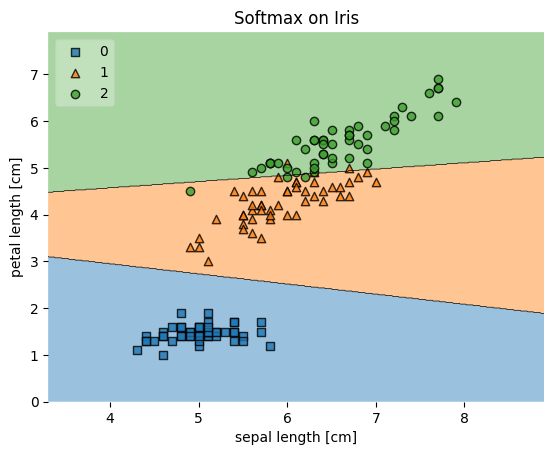

In [41]:
# Plot decision regions on entire dataset (not split, so visualization is better)
plot_decision_regions(X, y, clf=clf, legend=2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')
plt.show()


# Polynomial Features in Logistic Regression

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('/content/ushape.csv')

In [44]:
print(df.head())

   3.159499363321345566e-02  9.869877579082642072e-01  \
0                  2.115098                 -0.046244   
1                  0.882490                 -0.075756   
2                 -0.055144                 -0.037332   
3                  0.829545                 -0.539321   
4                  2.112857                  0.662084   

   0.000000000000000000e+00  
0                       1.0  
1                       0.0  
2                       1.0  
3                       1.0  
4                       1.0  


In [45]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

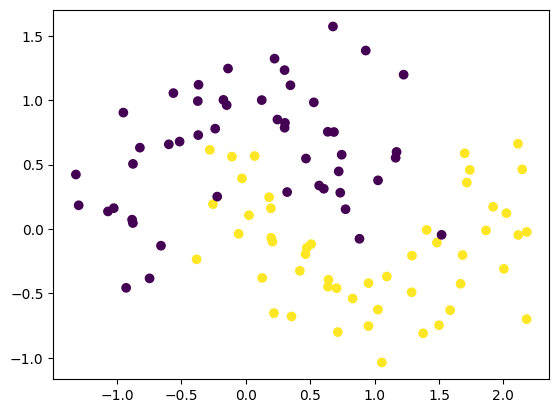

In [46]:
plt.scatter(X[:,0],X[:,1],c=y)

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [48]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

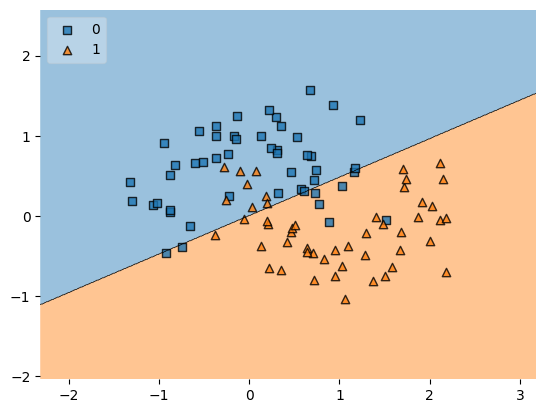

In [49]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y.astype('int'), clf, legend=2)

In [50]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [52]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

np.float64(0.9099999999999999)

In [53]:
def plot_decision_boundary(X,y,degree=1):

    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)

    clf = LogisticRegression()
    clf.fit(X_trf,y)

    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)

    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))

    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

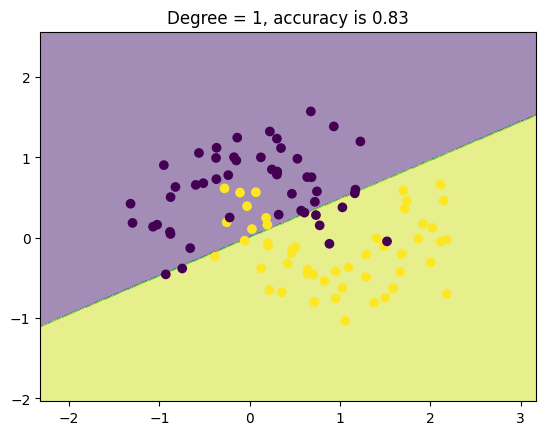

In [54]:
plot_decision_boundary(X,y)

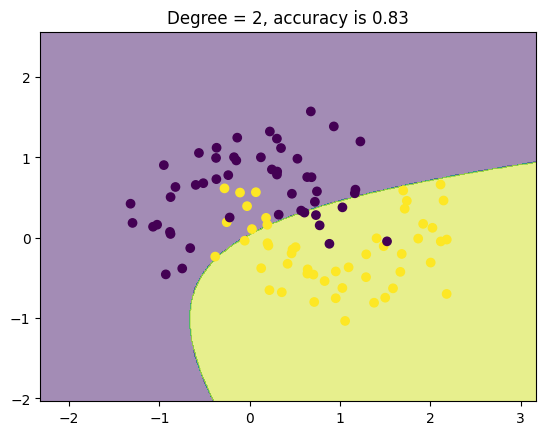

In [55]:
plot_decision_boundary(X,y,degree=2)

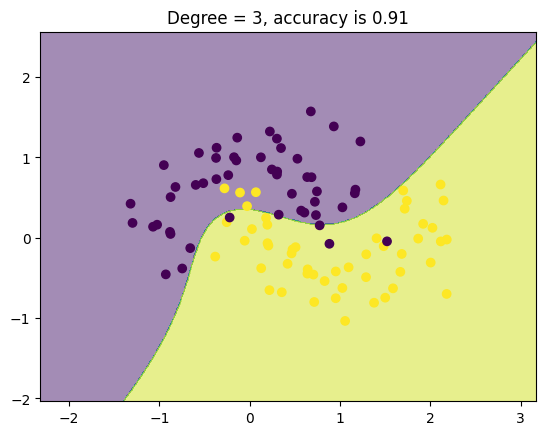

In [56]:
plot_decision_boundary(X,y,degree=3)

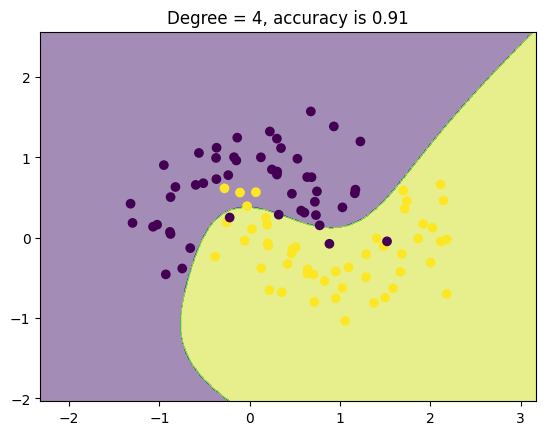

In [57]:
plot_decision_boundary(X,y,degree=4)

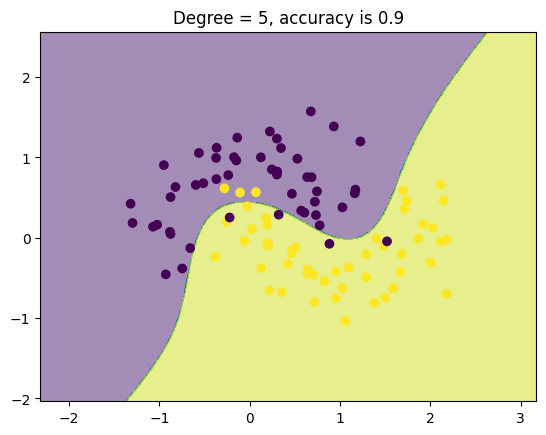

In [58]:
plot_decision_boundary(X,y,degree=5)

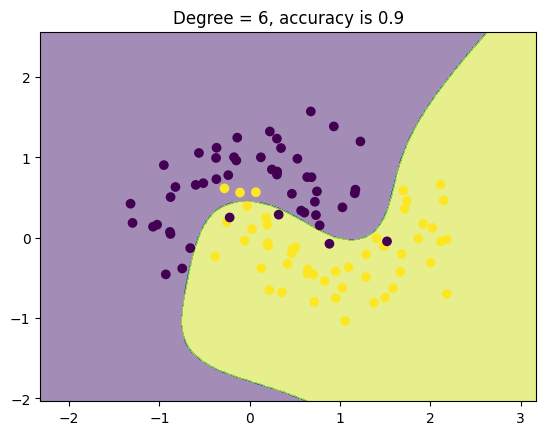

In [59]:
plot_decision_boundary(X,y,degree=6)

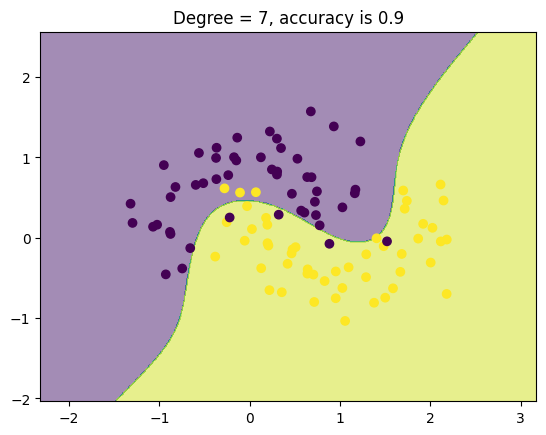

In [60]:
plot_decision_boundary(X,y,degree=7)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

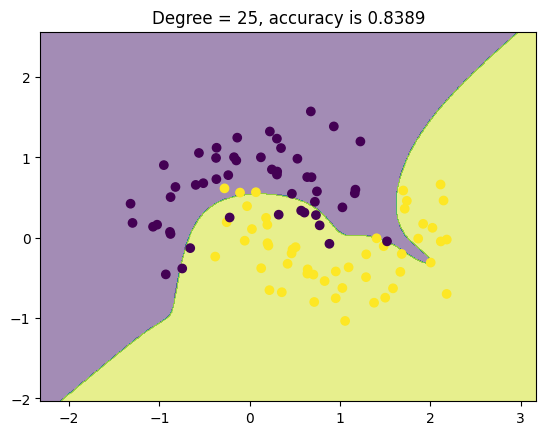

In [65]:
plot_decision_boundary(X,y,degree=25)